In [9]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
from sklearn import preprocessing
from matplotlib.dates import HourLocator, DateFormatter
import random
random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [ ]:
feb_30m = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/02_02_06_02/eddypro_csat_full_output_2021-10-25T195053_exp.csv',
                     header= [1,2])
feb_30m.columns = feb_30m.columns.map('_'.join)

In [ ]:
feb_5m_1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/New folder/2feb/eddy_5min/eddypro_gill_full_output_2022-03-18T202636_exp.csv',
                      header=[1,2])
feb_5m_1.columns = feb_5m_1.columns.map('_'.join)

In [ ]:
feb_5m_2 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/New folder/3feb/eddy_5min/eddypro_gill_full_output_2022-03-18T213837_exp.csv',
                      header=[1,2])
feb_5m_2.columns = feb_5m_2.columns.map('_'.join)

In [ ]:
feb_30m['TIMESTAMP']  = feb_30m['date_[yyyy-mm-dd]'].astype(str)+" "+ feb_30m['time_[HH:MM]'].astype(str)
feb_30m['TIMESTAMP']  = pd.to_datetime(feb_30m['TIMESTAMP'])

feb_5m_1['TIMESTAMP']  = feb_5m_1['date_[yyyy-mm-dd]'].astype(str)+" "+ feb_5m_1['time_[HH:MM]'].astype(str)
feb_5m_1['TIMESTAMP']  = pd.to_datetime(feb_5m_1['TIMESTAMP'])

feb_5m_2['TIMESTAMP']  = feb_5m_2['date_[yyyy-mm-dd]'].astype(str)+" "+ feb_5m_2['time_[HH:MM]'].astype(str)
feb_5m_2['TIMESTAMP']  = pd.to_datetime(feb_5m_2['TIMESTAMP'])


In [ ]:
feb_30m['H_[W+1m-2]'] =  pd.to_numeric(feb_30m['H_[W+1m-2]'])
feb_30m['LE_[W+1m-2]'] = pd.to_numeric(feb_30m['LE_[W+1m-2]'])
feb_30m['u*_[m+1s-1]'] = pd.to_numeric(feb_30m['u*_[m+1s-1]'])

In [ ]:
##filtering
def clean_flux(df):
    x1 = []
    x2 = []
    x3 = []
    x4 = []
    
    for i in range(len(df['qc_H_[#]'].values)):
        if df['qc_H_[#]'].values[i] >= 2.:
            x1.append(float('NAN'))
        else:
            x1.append(df['H_[W+1m-2]'].values[i])
    
    for i in range(len(df['qc_LE_[#]'].values)):
        if df['qc_LE_[#]'].values[i] >= 2.:
            x2.append(float('NAN'))
        else:
            x2.append(df['LE_[W+1m-2]'].values[i])
            
    for i in range(len(x1)):
        if x1[i] < -1000:
            x3.append(float('nan'))
        else:
            x3.append(x1[i])
            
    for i in range(len(x2)):
        if x2[i] < -50:
            x4.append(float('nan'))
        else:
            x4.append(x2[i])
    return x3,x4
        
        

In [ ]:
feb_30m['H_[W+1m-2]'],feb_30m['LE_[W+1m-2]'] = clean_flux(feb_30m)


In [ ]:
plt.plot(feb_30m['LE_[W+1m-2]'])
plt.plot(feb_30m['H_[W+1m-2]'])

In [ ]:
plt.plot(feb_30m['u*_[m+1s-1]'])

In [ ]:
feb_5m = pd.concat([feb_5m_1,feb_5m_2], axis=0,ignore_index= True)

In [ ]:
feb_5m['H_[W+1m-2]'] = pd.to_numeric(feb_5m['H_[W+1m-2]'])


In [ ]:
##filtering
def clean_flux_1(df,ustar):
    x1 = []
    x2 = []
    x3 = []
    for i in range(len(df['qc_H_[#]'].values)):
        if df['qc_H_[#]'].values[i] >= 2.:
            x1.append(float('NAN'))
        else:
            x1.append(df['H_[W+1m-2]'].values[i])
            
    for i in range(len(x1)):
        if x1[i] < -1000 or x1[i] > 400:
            x2.append(float('nan'))
        else:
            x2.append(x1[i])
            
    for i in range(len(df[ustar].values)):
        if df[ustar].values[i] < -1000:
            x3.append(float('nan'))
        else:
            x3.append(df[ustar].values[i])
    return x2,x3
            
feb_5m['H_[W+1m-2]'], feb_5m['u*_[m+1s-1]'] = clean_flux_1(feb_5m,'u*_[m+1s-1]')

In [ ]:
##resample to 30 minutes

feb_5m_new = feb_5m.resample('30T', on = 'TIMESTAMP', closed='right', label='right').mean()
feb_5m_new.reset_index(inplace = True)

In [ ]:
feb_5m_new

In [ ]:
feb_30m['TIMESTAMP']

In [ ]:
merged = pd.merge(feb_5m_new, feb_30m,on = 'TIMESTAMP' ,how= 'left')
arr1 = merged['u*_[m+1s-1]_x'].values
arr2 = merged['u*_[m+1s-1]_y'].values
arr3 = merged['H_[W+1m-2]_x'].values
arr4 = merged['H_[W+1m-2]_y'].values

In [ ]:
plt.plot(merged['u*_[m+1s-1]_x'])
plt.plot(merged['u*_[m+1s-1]_y'])

In [ ]:
plt.plot(merged['H_[W+1m-2]_x'])
plt.plot(merged['H_[W+1m-2]_y'])

In [ ]:
df = pd.DataFrame(np.concatenate([arr1, arr2, arr3,arr4], axis=1), columns= ['ustar_30',
                                                                             'ustar_2.5',
                                                                             ''])

In [ ]:
merge = pd.read_excel('/Users/varungandhi/Desktop/gillvscsat.xlsx',header= [0,1,2])
merge.columns = merge.columns.map('_'.join)

In [ ]:
merge['TIMESTAMP']  = merge['30m_date_[yyyy-mm-dd]'].astype(str)+" "+ merge['30m_time_[HH:MM]'].astype(str)
merge['TIMESTAMP']  = pd.to_datetime(merge['TIMESTAMP'])
merge['30m_H_[W+1m-2]'] = pd.to_numeric(merge['30m_H_[W+1m-2]'])
merge['2.5m_H_2.5_[W+1m-2]'] = pd.to_numeric(merge['2.5m_H_2.5_[W+1m-2]'])

In [ ]:
merge.columns

In [ ]:
sensible = merge[['TIMESTAMP', '30m_H_[W+1m-2]','30m_qc_H_[#]', 
                  '2.5m_H_2.5_[W+1m-2]', '2.5m_qc_H_[#]']]

In [ ]:
ustar = merge[['TIMESTAMP', '30m_u*_[m+1s-1]', '2.5m_u*_2.5_[m+1s-1]']]

In [ ]:
def clean_H(df,H,qc_H):
    x1 = []
    x2 = []
    x3 = []
    for i in range(len(df[qc_H].values)):
        if df[qc_H].values[i] >= 2.:
            x1.append(float('NAN'))
        else:
            x1.append(df[H].values[i])
            
    for i in range(len(x1)):
        if x1[i] < -50 or x1[i] > 400:
            x2.append(float('nan'))
        else:
            x2.append(x1[i])
    return x2
            

sensible['30m_H_[W+1m-2]'] = clean_H(sensible,'30m_H_[W+1m-2]','30m_qc_H_[#]')
sensible['2.5m_H_2.5_[W+1m-2]'] = clean_H(sensible,'2.5m_H_2.5_[W+1m-2]', '2.5m_qc_H_[#]')

In [ ]:
plt.plot(merge['30m_H_[W+1m-2]'])

In [ ]:
plt.plot(sensible['30m_H_[W+1m-2]'])

In [ ]:
plt.plot(sensible['2.5m_H_2.5_[W+1m-2]'])

In [ ]:
ustar = ustar.dropna()
sensible = sensible.dropna()

In [ ]:


lof1 = LocalOutlierFactor(n_neighbors = 1, metric = "manhattan",contamination=0.1)
#lof1 = IsolationForest(n_estimators=2000, max_samples='auto', contamination=float(.12),
#                       max_features=1.0, bootstrap=False, n_jobs=-1, 
#                       random_state=42, verbose=0)
X = ustar['2.5m_u*_2.5_[m+1s-1]'].values.reshape(-1,1)
Y = ustar['30m_u*_[m+1s-1]'].values.reshape(-1,1)

Y_pred = lof1.fit_predict(X)
mask1 = Y_pred != -1
X, Y = X[mask1], Y[mask1]

model1 = LinearRegression(fit_intercept= False)
model1.fit(X, Y)
Y_pred = model1.predict(X)



In [ ]:
print('slope:', model1.coef_)
print('intercept:', model1.intercept_)
print('coefficient of determination:', model1.score(X,Y))

In [ ]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(X,Y)
ax.plot(X, Y_pred, color='red')
ax.set_xlabel('$\mathbf{u*\ (2.5m)\ (m/s)}$',fontsize = 22,fontweight = 'bold')
ax.set_ylabel('$\mathbf{u*\ (30m)\ (m/s)}$', fontsize = 22 ,fontweight = 'bold')
ax.set_ylim([0.0,0.8])
ax.set_xlim([0.0,0.4])
ax.set_xticks(np.arange(0.05,0.41,0.05))
#ax.text(2.0, 80, r'$R^2 = 0.97$',  fontsize = 25)
ax.text(0.3, 0.7, r'$y = 1.51x$', fontsize = 25)
ax.text(-0.05,0.8, r'$\mathbf{a})$', fontsize = 25)

ax.tick_params(axis='x', which='both', labelsize=20)
ax.tick_params(axis='y', which='both', labelsize=20)


In [ ]:
lof2 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan",contamination=0.1)
#lof1 = IsolationForest(n_estimators=2000, max_samples='auto', contamination=float(.12),
#                       max_features=1.0, bootstrap=False, n_jobs=-1, 
#                       random_state=42, verbose=0)
Xx = sensible['2.5m_H_2.5_[W+1m-2]'].values.reshape(-1,1)
Yy = sensible['30m_H_[W+1m-2]'].values.reshape(-1,1)

Yy_pred = lof2.fit_predict(Xx)
mask2 = Yy_pred != -1
Xx, Yy = Xx[mask2], Yy[mask2]

model2 = LinearRegression(fit_intercept= False)
model2.fit(Xx, Yy)
Yy_pred = model1.predict(Xx)

In [ ]:
print('slope:', model2.coef_)
print('intercept:', model2.intercept_)
print('coefficient of determination:', model2.score(Xx,Yy))

In [ ]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(Xx,Yy)
ax.plot(Xx, Yy_pred, color='red')
#ax.set_xlabel('$\mathbf{u*\ (2.5m)\ (m/s)}$',fontsize = 22,fontweight = 'bold')
#ax.set_ylabel('$\mathbf{u*\ (30m)\ (m/s)}$', fontsize = 22 ,fontweight = 'bold')
#ax.set_ylim([0.0,0.8])
#ax.set_xlim([0.0,0.4])
#ax.set_xticks(np.arange(0.05,0.41,0.05))
##ax.text(2.0, 80, r'$R^2 = 0.97$',  fontsize = 25)
#ax.text(0.3, 0.7, r'$y = 1.51x$', fontsize = 25)
#ax.text(-0.05,0.8, r'$\mathbf{a})$', fontsize = 25)

#ax.tick_params(axis='x', which='both', labelsize=20)
#ax.tick_params(axis='y', which='both', labelsize=20)


In [57]:
##from here

finale = pd.read_excel('/Users/varungandhi/Desktop/gillvscsat.xlsx', sheet_name='Sheet2',
                      header= [4])
#finale

In [58]:
finale2 = pd.read_excel('/Users/varungandhi/Desktop/gillvscsat.xlsx', sheet_name='Sheet3')

In [59]:
finale['u_gill'] = pd.to_numeric(finale['u_gill'])
finale['u_csat'] = pd.to_numeric(finale['u_csat'])
finale['H_csat'] = pd.to_numeric(finale['H_csat'])
finale['H_gill'] = pd.to_numeric(finale['H_gill'])
finale2['u_gill'] = pd.to_numeric(finale2['u_gill'])
finale2['u_csat'] = pd.to_numeric(finale2['u_csat'])
finale2['H_csat'] = pd.to_numeric(finale2['H_csat'])
finale2['H_gill'] = pd.to_numeric(finale2['H_gill'])

In [60]:
ss = finale[['H_csat', 'H_gill']]
us = finale[['u_csat', 'u_gill']]
ss2 = finale2[['H_csat', 'H_gill']]
us2 = finale2[['u_csat', 'u_gill']]

In [61]:
ss = ss.dropna()
us = us.dropna()
ss2 = ss2.dropna()
us2 = us2.dropna()

In [62]:
lof1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan",contamination=0.2)
#lof1 = IsolationForest(n_estimators=2000, max_samples='auto', contamination=float(.12),
#                       max_features=1.0, bootstrap=False, n_jobs=-1, 
#                       random_state=42, verbose=0)
X = us2['u_csat'].values.reshape(-1,1)
Y = us2['u_gill'].values.reshape(-1,1)

Y_pred = lof1.fit_predict(X)
mask1 = Y_pred != -1
X, Y = X[mask1], Y[mask1]

model1 = LinearRegression(fit_intercept= False)
model1.fit(X, Y)
Y_pred = model1.predict(X)


In [63]:
print('slope:', model1.coef_)
print('intercept:', model1.intercept_)
print('coefficient of determination:', model1.score(X,Y))

slope: [[1.5455953]]
intercept: 0.0
coefficient of determination: 0.8557053921964926


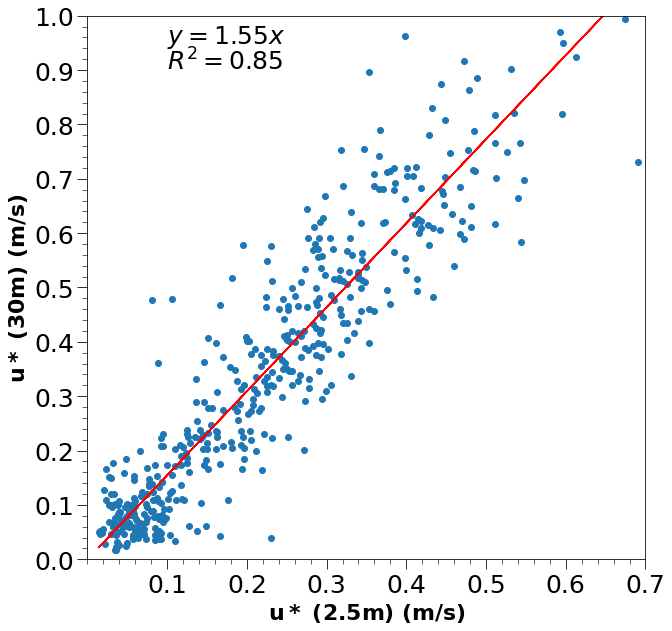

In [162]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(X,Y)
ax.plot(X, Y_pred, color='red')
ax.set_xlabel('$\mathbf{u*\ (2.5m)\ (m/s)}$',fontsize = 22,fontweight = 'bold')
ax.set_ylabel('$\mathbf{u*\ (30m)\ (m/s)}$', fontsize = 22 ,fontweight = 'bold')
ax.set_ylim([0.0,1.])
ax.set_xlim([0.0,0.7])
ax.set_xticks(np.arange(0.1,0.72,0.1))
ax.set_yticks(np.arange(0.0,1.1,0.1))


ax.text(0.1, 0.95, r'$y = 1.55x$', fontsize = 25)
ax.text(0.1, 0.9, r'$R^2 = 0.85$',  fontsize = 25)
#ax.text(-0.1,1.0, r'$\mathbf{a})$', fontsize = 25)

ax.tick_params(axis='both', which='major', labelsize=25,size = 10)
ax.tick_params(axis='both', which='minor', labelsize=25,size = 5)
ax.minorticks_on()

In [141]:
lof2 = LocalOutlierFactor(n_neighbors = 10, metric = "manhattan",contamination=0.02)
#lof1 = IsolationForest(n_estimators=2000, max_samples='auto', contamination=float(.12),
#                       max_features=1.0, bootstrap=False, n_jobs=-1, 
#                       random_state=42, verbose=0)
x1 = ss2['H_csat'].values.reshape(-1,1)
y1 = ss2['H_gill'].values.reshape(-1,1)

y1_pred = lof2.fit_predict(x1)
mask2 = y1_pred != -1
x1, y1 = x1[mask2], y1[mask2]

model2 = LinearRegression(fit_intercept= False)
model2.fit(x1, y1)
y1_pred = model1.predict(x1)
y1_pred = 0.84*y1_pred
y1_pred

array([[ -5.43810803],
       [ -2.22407913],
       [-51.07857139],
       [-44.36058773],
       [-19.50972629],
       [-13.48683327],
       [-43.22094488],
       [-28.23428942],
       [ -9.72350128],
       [ 35.30598194],
       [ 82.08383027],
       [148.98749891],
       [137.2056378 ],
       [153.23331205],
       [ 99.70920049],
       [140.52577637],
       [197.48672005],
       [114.5316345 ],
       [ 91.61808264],
       [ 66.62472692],
       [ 38.50420663],
       [ 11.40413941],
       [-14.04039518],
       [-14.61458357],
       [ -1.8082113 ],
       [-19.30459372],
       [ -5.1206799 ],
       [ -2.37968637],
       [  1.75554809],
       [ -7.89960237],
       [ 17.13232312],
       [100.60931971],
       [150.87463594],
       [157.82114338],
       [155.5553487 ],
       [165.80716657],
       [204.60165635],
       [182.59010572],
       [189.20490646],
       [128.85643892],
       [ 86.19395158],
       [ 76.90483423],
       [ 53.50989258],
       [ 15

In [142]:
print('slope:', model2.coef_)
print('intercept:', model2.intercept_)
print('coefficient of determination:', model2.score(x1,y1))

slope: [[1.04865512]]
intercept: 0.0
coefficient of determination: 0.8692539487920674


In [143]:
#import numpy as np
#
#import statsmodels.api as sm 
#mod = sm.OLS(x1,y1)
#res = mod.fit()
#print(res.summary())

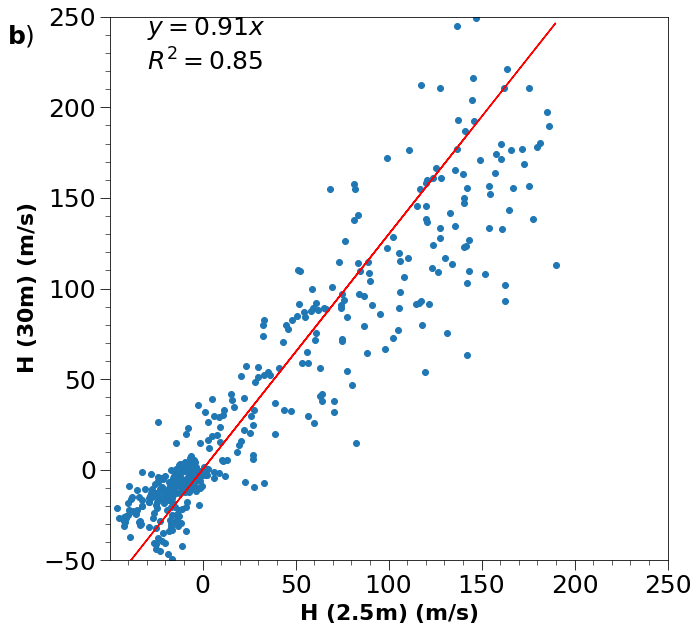

In [161]:
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x1,y1)
ax.plot(x1,y1_pred,color='red')
ax.set_xlabel('$\mathbf{H\ (2.5m)\ (m/s)}$',fontsize = 22,fontweight = 'bold')
ax.set_ylabel('$\mathbf{H\ (30m)\ (m/s)}$', fontsize = 22 ,fontweight = 'bold')
ax.set_ylim([-50,250.])
ax.set_xlim([-50,250.])
ax.set_yticks(np.arange(-50,251,50))
ax.set_xticks(np.arange(0,251,50))
#
#
ax.text(-30,240, r'$y =  0.91x$', fontsize = 25)
ax.text(-30,220, r'$R^2 = 0.85$',  fontsize = 25)
ax.text(-105,235, r'$\mathbf{b})$', fontsize = 25)
#
ax.tick_params(axis='both', which='major', labelsize=25,size = 10)
ax.tick_params(axis='both', which='minor', labelsize=25,size = 5)
ax.minorticks_on()

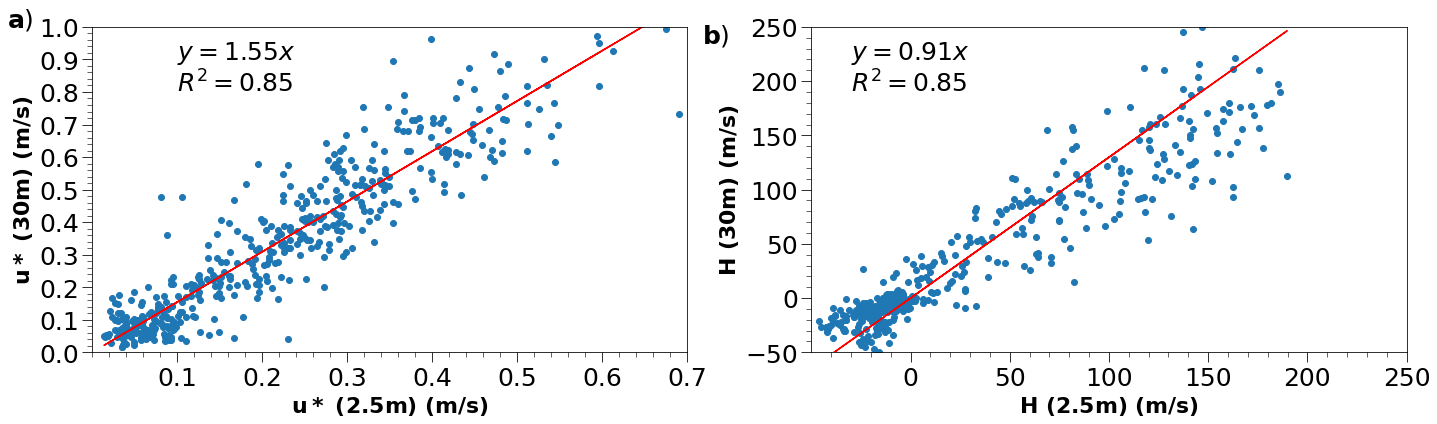

In [177]:
fig,ax = plt.subplots(1,2, figsize = (20,6))
ax[0].scatter(X,Y)
ax[0].plot(X, Y_pred, color='red')
ax[0].set_xlabel('$\mathbf{u*\ (2.5m)\ (m/s)}$',fontsize = 22,fontweight = 'bold')
ax[0].set_ylabel('$\mathbf{u*\ (30m)\ (m/s)}$', fontsize = 22 ,fontweight = 'bold')
ax[0].set_ylim([0.0,1.])
ax[0].set_xlim([0.0,0.7])
ax[0].set_xticks(np.arange(0.1,0.72,0.1))
ax[0].set_yticks(np.arange(0.0,1.1,0.1))


ax[0].text(0.1, 0.9, r'$y = 1.55x$', fontsize = 25)
ax[0].text(0.1, 0.8, r'$R^2 = 0.85$',  fontsize = 25)
ax[0].text(-0.1,1.0, r'$\mathbf{a})$', fontsize = 25)


ax[0].tick_params(axis='both', which='major', labelsize=25,size = 10)
ax[0].tick_params(axis='both', which='minor', labelsize=25,size = 5)
ax[0].minorticks_on()

ax[1].scatter(x1,y1)
ax[1].plot(x1,y1_pred,color='red')
ax[1].set_xlabel('$\mathbf{H\ (2.5m)\ (m/s)}$',fontsize = 22,fontweight = 'bold')
ax[1].set_ylabel('$\mathbf{H\ (30m)\ (m/s)}$', fontsize = 22 ,fontweight = 'bold')
ax[1].set_ylim([-50,250.])
ax[1].set_xlim([-50,250.])
ax[1].set_yticks(np.arange(-50,251,50))
ax[1].set_xticks(np.arange(0,251,50))
#
#
ax[1].text(-30,220, r'$y =  0.91x$', fontsize = 25)
ax[1].text(-30,190, r'$R^2 = 0.85$',  fontsize = 25)
#
ax[1].text(-105,235, r'$\mathbf{b})$', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=25,size = 10)
ax[1].tick_params(axis='both', which='minor', labelsize=25,size = 5)
ax[1].minorticks_on()
fig.tight_layout()